# Загрузка данных

Данные можно найти по [ссылке](https://drive.google.com/drive/folders/1GiL4FCOYVBB61wcCjN_qTHY18wkOMrRk?usp=sharing)

In [ ]:
import pandas as pd
import csv
import numpy as np

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data_drive2/drive2_BMW.csv", delimiter=';', on_bad_lines='skip', quotechar="'", engine='python')

In [ ]:
rows_to_join = []

to_add = 0
flag = False
for i in range(len(df)):
    if pd.isna(df.at[i, "Время публикации"]) and pd.isna(df.at[i, "Описание"]):
      if not flag:
        to_add = i - 1
        flag = True
      rows_to_join.append(df.at[i, "Модель автомобиля"])
      df.drop(i, inplace=True)
    else:
      if rows_to_join:
        if pd.isna(df.at[to_add, "Описание"]):
          df.at[to_add, "Описание"] = ""
        df.at[to_add, "Описание"] += " " + " ".join(rows_to_join)
        rows_to_join = []
        flag = False

df.reset_index(drop=True, inplace=True)

In [ ]:
df.head(20)

,Модель автомобиля,Время публикации,Описание
0,BMW X1,2025-01-17,Добрый день. Листал как то Яндекс маркет и нат...
1,BMW 3 series AventurineRot «Вишенка»,2025-01-17,"""Так, ну я, в общем, всего месяц не думал о ма..."
2,BMW X5 40d,2025-01-17,"Пришла посылка, пока думаем, что с ней делать"
3,BMW 5 series Experimental,2025-01-17,"""Нашел человека который сделает pappel natur П..."
4,BMW 5 series LifestyleEdition 3.0d MT,2025-01-17,"""Народ ✌️ всем привет, с прошедшими всех празд..."
5,BMW 3 series Красная машинка жены,2025-01-17,"""Продолжаю приваривать морду, много мелочей вы..."
6,BMW X5 RHINO 40d,2025-01-17,"""Всем привет ! Заранее хочу поблагодарить, кто..."
7,BMW X5,2025-01-17,"""Господа, пара вопросов: Что за синий разьем в..."
8,BMW 7 series 🇩🇪 tiefe Nacht 🇩🇪,2025-01-17,"""Всем привет👋 Запись больше для себя и истории..."
9,BMW 7 series Баржа,2025-01-17,"""Бумер-тормоз все еще не ездит. Первая часть з..."


In [ ]:
df = df.dropna()

# Предобработка текстовых данных

In [ ]:
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 65.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy


nlp = spacy.load("ru_core_news_sm")

In [ ]:
!pip install demoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 3.0 MB/s eta 0:00:00


In [ ]:
import demoji

def remove_emoji(text):
    new_text = demoji.replace(text, '')
    return new_text

In [ ]:
def preprocess(text):
  text = remove_emoji(text)
  doc = nlp(' '.join(list(map(lambda x: x.lower(), text.split()))))
  no_punct = [token for token in doc if not token.is_punct]
  no_stop = [token for token in no_punct if not token.is_stop]
  return " ".join([token.lemma_ for token in no_stop])

In [ ]:
df["Предобработанные данные"] = df["Описание"].apply(preprocess)
df

,Модель автомобиля,Время публикации,Описание,Предобработанные данные
0,BMW X1,2025-01-17,Добрый день. Листал как то Яндекс маркет и нат...,добрый день листать яндекс маркет наткнуться к...
1,BMW 3 series AventurineRot «Вишенка»,2025-01-17,"""Так, ну я, в общем, всего месяц не думал о ма...",общий месяц думать машина приехать проведать п...
2,BMW X5 40d,2025-01-17,"Пришла посылка, пока думаем, что с ней делать",прийти посылка думать делать
3,BMW 5 series Experimental,2025-01-17,"""Нашел человека который сделает pappel natur П...",найти человек сделать pappel natur поехать тар...
4,BMW 5 series LifestyleEdition 3.0d MT,2025-01-17,"""Народ ✌️ всем привет, с прошедшими всех празд...",народ привет прошедшими праздник вопросик пове...
...,...,...,...,...
5917,BMW 5 series Бестия,2024-12-17,"""Сборка затянулась 😵‍💫 ну радует только то что...",сборка затянуться радовать финишный прямая ост...
5918,BMW X5 ХАпять,2024-12-17,"""Всем привет !))) Немного полезной информации,...",привет полезный информация причина последствие...
5921,BMW X5,2024-12-17,"""Имеется новый нерабочий ДМРВ vdo.Несовсем кон...",иметься новый нерабочий дмрв vdo.несовсем новы...
5922,BMW 4 series ❄440xdrive,2024-12-17,"""Всем привет, давно как мне казалось для внешн...",привет внешний вид 440 хватать порог губа коле...


In [ ]:
def preprocess2(text):
  text = ' '.join([i for i in text.split() if not i.isdigit()])
  return text

In [ ]:
df["Предобработанные данные"] = df["Предобработанные данные"].apply(preprocess2)

In [ ]:
df['Предобработанные данные'].to_csv('drive2_BMW_preprocessed.csv', index=False, encoding='utf-8-sig', sep=';')

In [ ]:
df['Описание'].to_csv('drive2_BMW_all.csv', index=False, encoding='utf-8-sig', sep=';')

# Bag-Of-Words model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer()
bow = vectorizer.fit_transform([df['Предобработанные данные'][0]])
count_array = bow.toarray()
features = vectorizer.get_feature_names_out()

df_bow = pd.DataFrame(data=count_array, columns=features)

Получили частоту встречаемости каждого слова в отдельно взятом сообщении.

In [ ]:
df_bow.transpose()

,0
алик,1
белый,1
бмв,1
взять,1
вч,2
выход,1
гу,1
дело,1
день,2
добрый,1


Посмотрим на топ-10 наиболее часто встречающихся слов:

In [ ]:
df_bow.iloc[0].nlargest(10).index.tolist()

['вч',
 'день',
 'заказать',
 'искать',
 'колонка',
 'комплект',
 'черно',
 'яндекс',
 'алик',
 'белый']

В целом, этого уже достаточно, чтобы сделать минимальные выводы об изначальном тексте: проблемы никакой у автовладельца нет, он просто решил обновить акустическую систему в своем автомобиле.

# TF-IDF model

В данном алгоритме значимость отдельного слова в каждом сообщении оценивается относительно встречаемости этого слова во всех сообщениях датасета.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer2 = TfidfVectorizer()
tf_idf = vectorizer2.fit_transform(df['Предобработанные данные'])
count_array = tf_idf.toarray()
features = vectorizer2.get_feature_names_out()

df_tf_idf = pd.DataFrame(data=count_array, columns=features)

In [ ]:
df_tf_idf.iloc[0].nlargest(10).index.tolist()

['черно',
 'вч',
 'яндекс',
 'колонка',
 'подпитать',
 'подцепиться',
 'жгуте',
 'рубеж',
 'маркет',
 'искать']

Сравнивая этот список с полученным выше, видим:
1. Некоторые слова встречаются одновременно в обоих списках двух рассматриваемых алгоритмов.
2. Алгоритм TF-IDF выделил слова, характерные для тематики автомобильного форума, в отличие от BOW.

# KNN

Алгоритм K-Nearest Neighbors относится к классу метрических методов: подобные алгоритмы просто запоминают всю обучающую выборку, а на этапе предсказания ищут объекты, похожие на целевой.

Применим KNN, используя TF-IDF векторы, для задачи многоклассовой классификации (но сперва - подготовка train и test датасетов):

In [ ]:
import pandas as pd
import csv
import numpy as np

In [ ]:
df_preprocessed = pd.read_csv("/content/drive2_BMW_preprocessed.csv", delimiter=';', on_bad_lines='skip', quotechar="'", engine='python')
df_preprocessed_target = pd.read_csv("/content/drive2_BMW_target171.csv", delimiter=';', on_bad_lines='skip', quotechar="'", engine='python')

In [ ]:
X_test = df_preprocessed[:171]
X_test = X_test.iloc[:, 0]
y_test = df_preprocessed_target

In [ ]:
df_train = pd.read_csv("/content/drive2_BMW_all (1).csv", delimiter=';', on_bad_lines='skip', quotechar="'", engine='python')

In [ ]:
df_train["Предобработанные данные"] = df_train["Описание"].apply(preprocess)
df_train["Предобработанные данные"] = df_train["Предобработанные данные"].apply(preprocess2)

In [ ]:
X_train = df_train['Предобработанные данные']
y_train = df_train['Неисправность']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

Подберем оптимальное количество соседей:

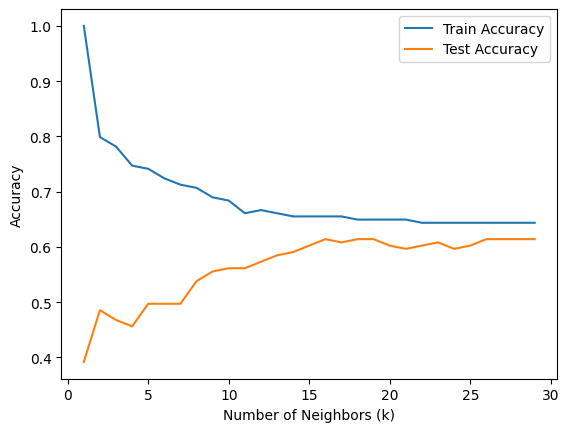

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt


train_accuracy = []
test_accuracy = []

for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(range(1, 30), train_accuracy, label='Train Accuracy')
plt.plot(range(1, 30), test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Остановимся на $k = 16$

In [ ]:
from sklearn.metrics import classification_report


knn = KNeighborsClassifier(n_neighbors=16, metric='cosine')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Classification Report:")
labels = ['система впрыска', 'топливная система', 'система зажигания', 'система смазки',
              'кривошипно-шатунный механизм', 'система охлаждения', 'выпускная система', 'сцепление',
              'коробка передач', 'газораспределительный механизм', 'подвеска', 'рулевое управление',
              'тормозная система', 'электрооборудование', 'системы отопления и кондиционирования',
              'неисправность отсутствует']
print(classification_report(y_test, y_pred, labels=labels, zero_division=0))

Classification Report:
                                       precision    recall  f1-score   support

                      система впрыска       0.00      0.00      0.00         2
                    топливная система       0.00      0.00      0.00         1
                    система зажигания       0.00      0.00      0.00         2
                       система смазки       0.00      0.00      0.00         4
         кривошипно-шатунный механизм       0.00      0.00      0.00         4
                   система охлаждения       0.00      0.00      0.00         9
                    выпускная система       0.00      0.00      0.00         1
                            сцепление       0.00      0.00      0.00         1
                      коробка передач       0.00      0.00      0.00         3
       газораспределительный механизм       0.00      0.00      0.00         0
                             подвеска       1.00      0.12      0.22         8
                   рулевое у

Имеем (macro-average) для модели:

precision: 0.16

recall: 0.07

f1-score: 0.07

# Logistic Regression

Логистическая регрессия использует линейную комбинацию входных признаков и соответствующих весов, описывая линейную гиперплоскость в пространстве признаков. Затем этот результат проходит через логистическую функцию, которая переводит линейную комбинацию в вероятность принадлежности объекта к одному из классов. В случае многоклассовой классификации мы строим K линейных моделей, а затем используем softmax преобразование, чтобы получить вероятность k-го класса.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score
from sklearn.utils.class_weight import compute_class_weight


classes = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)

weight_dict = dict(zip(classes, class_weights))

model = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    max_iter=1000,
    class_weight=weight_dict,
    random_state=42
)

param_grid = {
    'C': np.logspace(-3, 3, 7),
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Classification Report")
labels = ['система впрыска', 'топливная система', 'система зажигания', 'система смазки',
              'кривошипно-шатунный механизм', 'система охлаждения', 'выпускная система', 'сцепление',
              'коробка передач', 'газораспределительный механизм', 'подвеска', 'рулевое управление',
              'тормозная система', 'электрооборудование', 'системы отопления и кондиционирования',
              'неисправность отсутствует']
print(classification_report(y_test, y_pred, labels=labels, zero_division=0))

Fitting 5 folds for each of 14 candidates, totalling 70 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report
                                       precision    recall  f1-score   support

                      система впрыска       0.00      0.00      0.00         2
                    топливная система       0.00      0.00      0.00         1
                    система зажигания       0.00      0.00      0.00         2
                       система смазки       0.00      0.00      0.00         4
         кривошипно-шатунный механизм       0.00      0.00      0.00         4
                   система охлаждения       0.33      0.22      0.27         9
                    выпускная система       0.00      0.00      0.00         1
                            сцепление       0.00      0.00      0.00         1
                      коробка передач       0.00      0.00      0.00         3
       газораспределительный механизм       0.00      0.00      0.00         0
                             подвеска       0.14      0.12      0.13         8
                   рулевое уп

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Имеем (macro-average) для модели:

precision: 0.08

recall: 0.07

f1-score: 0.07

# CatBoost

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 99.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [ ]:
!pip uninstall -y numpy catboost
!pip install numpy==1.23.5 catboost

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: catboost 1.2.7
Uninstalling catboost-1.2.7:
  Successfully uninstalled catboost-1.2.7
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached catboost-1.2.7-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
Using cached catboost-1.2.7-cp311-cp311-manylinux2014_x86_64.whl (98.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.2

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report, f1_score
from sklearn.utils.class_weight import compute_class_weight


classes = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)

weight_dict = dict(zip(classes, class_weights))


model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    loss_function='MultiClass',
    eval_metric='TotalF1',
    class_weights=weight_dict,
    task_type='GPU',
    random_seed=42,
    verbose=100,
    early_stopping_rounds=50
)


model.fit(
    X_train, y_train
)


y_pred = model.predict(X_test)
print("Classification Report")
labels = ['система впрыска', 'топливная система', 'система зажигания', 'система смазки',
              'кривошипно-шатунный механизм', 'система охлаждения', 'выпускная система', 'сцепление',
              'коробка передач', 'газораспределительный механизм', 'подвеска', 'рулевое управление',
              'тормозная система', 'электрооборудование', 'системы отопления и кондиционирования',
              'неисправность отсутствует']
print(classification_report(y_test, y_pred, labels=labels, zero_division=0))

0:	learn: 0.4045698	total: 87.9ms	remaining: 1m 27s
100:	learn: 0.9724401	total: 1.87s	remaining: 16.6s
200:	learn: 0.9889901	total: 3.32s	remaining: 13.2s
300:	learn: 0.9937363	total: 4.79s	remaining: 11.1s
400:	learn: 0.9954800	total: 6.31s	remaining: 9.42s
500:	learn: 0.9960492	total: 7.83s	remaining: 7.8s
600:	learn: 0.9966230	total: 9.33s	remaining: 6.19s
700:	learn: 0.9971891	total: 11.9s	remaining: 5.07s
800:	learn: 0.9971891	total: 13.9s	remaining: 3.46s
900:	learn: 0.9977550	total: 15.4s	remaining: 1.69s
999:	learn: 0.9977550	total: 16.9s	remaining: 0us
Classification Report
                                       precision    recall  f1-score   support

                      система впрыска       0.00      0.00      0.00         2
                    топливная система       0.00      0.00      0.00         1
                    система зажигания       0.00      0.00      0.00         2
                       система смазки       0.00      0.00      0.00         4
         крив

попробуем подобрать гиперпараметры

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 17.4 MB/s eta 0:00:00


In [ ]:
import optuna

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 500, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1)
    }

    model = CatBoostClassifier(
        **params,
        loss_function='MultiClass',
        eval_metric='TotalF1',
        task_type='GPU',
        random_seed=42,
        early_stopping_rounds=50,
        verbose=False
    )

    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return f1_score(y_test, preds, average='macro')

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)
best_params = study.best_params

[I 2025-03-31 09:11:37,982] A new study created in memory with name: no-name-f097addb-a8dd-4cd5-87a7-2ff986933cc8
[I 2025-03-31 09:11:50,251] Trial 0 finished with value: 0.06809248272662907 and parameters: {'iterations': 1196, 'learning_rate': 0.08061431387337119, 'depth': 4, 'l2_leaf_reg': 1.312332035657846, 'bagging_temperature': 0.20969050786821208}. Best is trial 0 with value: 0.06809248272662907.
[I 2025-03-31 09:12:41,738] Trial 1 finished with value: 0.07049782576098365 and parameters: {'iterations': 1299, 'learning_rate': 0.2933253941902055, 'depth': 8, 'l2_leaf_reg': 7.916699447480895, 'bagging_temperature': 0.5277602548693745}. Best is trial 1 with value: 0.07049782576098365.
[I 2025-03-31 09:12:58,066] Trial 2 finished with value: 0.08214330808080807 and parameters: {'iterations': 1285, 'learning_rate': 0.022858369363265418, 'depth': 5, 'l2_leaf_reg': 1.9013582147007333, 'bagging_temperature': 0.7898662925842633}. Best is trial 2 with value: 0.08214330808080807.
[I 2025-03-

Classification Report
                                       precision    recall  f1-score   support

                      система впрыска       0.00      0.00      0.00         2
                    топливная система       0.00      0.00      0.00         1
                    система зажигания       0.00      0.00      0.00         2
                       система смазки       0.00      0.00      0.00         4
         кривошипно-шатунный механизм       0.25      0.25      0.25         4
                   система охлаждения       0.00      0.00      0.00         9
                    выпускная система       0.00      0.00      0.00         1
                            сцепление       0.00      0.00      0.00         1
                      коробка передач       0.00      0.00      0.00         3
       газораспределительный механизм       0.00      0.00      0.00         0
                             подвеска       0.00      0.00      0.00         8
                   рулевое уп

In [ ]:
best_model = CatBoostClassifier(
    **best_params,
    loss_function='MultiClass',
    eval_metric='TotalF1',
    task_type='GPU',
    random_seed=42,
    verbose=100
)

best_model.fit(
    X_train, y_train,
)

y_pred = best_model.predict(X_test)
print("Classification Report")
labels = ['система впрыска', 'топливная система', 'система зажигания', 'система смазки',
              'кривошипно-шатунный механизм', 'система охлаждения', 'выпускная система', 'сцепление',
              'коробка передач', 'газораспределительный механизм', 'подвеска', 'рулевое управление',
              'тормозная система', 'электрооборудование', 'системы отопления и кондиционирования',
              'неисправность отсутствует']
print(classification_report(y_test, y_pred, labels=labels, zero_division=0))

0:	learn: 0.6581129	total: 24.3ms	remaining: 32.2s
100:	learn: 0.6318040	total: 1.01s	remaining: 12.3s
200:	learn: 0.7055463	total: 1.77s	remaining: 9.9s
300:	learn: 0.7561394	total: 2.54s	remaining: 8.64s
400:	learn: 0.8250006	total: 3.31s	remaining: 7.65s
500:	learn: 0.8700578	total: 4.09s	remaining: 6.73s
600:	learn: 0.8901619	total: 4.84s	remaining: 5.84s
700:	learn: 0.9529402	total: 5.63s	remaining: 5.02s
800:	learn: 0.9761676	total: 6.42s	remaining: 4.21s
900:	learn: 1.0000000	total: 7.33s	remaining: 3.46s
1000:	learn: 1.0000000	total: 9.78s	remaining: 3.17s
1100:	learn: 1.0000000	total: 10.6s	remaining: 2.16s
1200:	learn: 1.0000000	total: 11.4s	remaining: 1.18s
1300:	learn: 1.0000000	total: 12.2s	remaining: 234ms
1325:	learn: 1.0000000	total: 12.3s	remaining: 0us
Classification Report
                                       precision    recall  f1-score   support

                      система впрыска       0.00      0.00      0.00         2
                    топливная система 

Имеем (macro-average) для модели:

precision: 0.11

recall: 0.08

f1-score: 0.08

Получилось немного повысить качество